<a href="https://colab.research.google.com/github/rsbaye/Data-Science-Projects/blob/main/BIA_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [61]:
# Define parameters
population_size = 1000000  # Total eligible population 1 million
prevalence_rate = 0.1  # 10% of population has the condition
incidence_rate = 0.02  # 2% annual incidence
uptake_rate = [0.1, 0.2, 0.25, 0.5, 0.55, 0.7, 0.9, 0.8]  # Uptake rates over 8 years
drug_cost_per_patient = 4500  # Annual cost of the new drug per patient
current_treatment_cost_per_patient = 3000  # Annual cost of current treatments per patient
cost_offset_per_patient = 1000  # Savings due to reduced complications/hospitalizations

# Time horizon
time_horizon = len(uptake_rate)

# Initialize results storage
results = []

# Calculate budget impact over time horizon
for year in range(time_horizon):
    # Calculate eligible population for each year
    prevalent_cases = population_size * prevalence_rate
    incident_cases = population_size * incidence_rate * (year + 1)
    total_cases = prevalent_cases + incident_cases

    # Patients treated with the new drug and current treatments
    patients_on_new_drug = total_cases * uptake_rate[year]
    patients_on_current_treatment = total_cases - patients_on_new_drug

    # Calculate costs for each scenario
    cost_new_drug_scenario = (
        patients_on_new_drug * drug_cost_per_patient +
        patients_on_current_treatment * current_treatment_cost_per_patient -
        patients_on_new_drug * cost_offset_per_patient
    )

    cost_reference_scenario = total_cases * current_treatment_cost_per_patient

    incremental_budget_impact = cost_new_drug_scenario - cost_reference_scenario

    # Store results
    results.append({
        "Year": year + 1,
        "Prevalent Cases": prevalent_cases,
        "Incident Cases": incident_cases,
        "Total Cases": total_cases,
        "Patients on New Drug": patients_on_new_drug,
        "Patients on Current Treatment": patients_on_current_treatment,
        "Cost (New Drug Scenario)": cost_new_drug_scenario,
        "Cost (Reference Scenario)": cost_reference_scenario,
        "Incremental Budget Impact": incremental_budget_impact
    })

# Convert results to DataFrame for analysis and visualization
results_df = pd.DataFrame(results)

# Display results
print(results_df)



   Year  Prevalent Cases  Incident Cases  Total Cases  Patients on New Drug  \
0     1         100000.0         20000.0     120000.0               12000.0   
1     2         100000.0         40000.0     140000.0               28000.0   
2     3         100000.0         60000.0     160000.0               40000.0   
3     4         100000.0         80000.0     180000.0               90000.0   
4     5         100000.0        100000.0     200000.0              110000.0   
5     6         100000.0        120000.0     220000.0              154000.0   
6     7         100000.0        140000.0     240000.0              216000.0   
7     8         100000.0        160000.0     260000.0              208000.0   

   Patients on Current Treatment  Cost (New Drug Scenario)  \
0                       108000.0               366000000.0   
1                       112000.0               434000000.0   
2                       120000.0               500000000.0   
3                        90000.0        

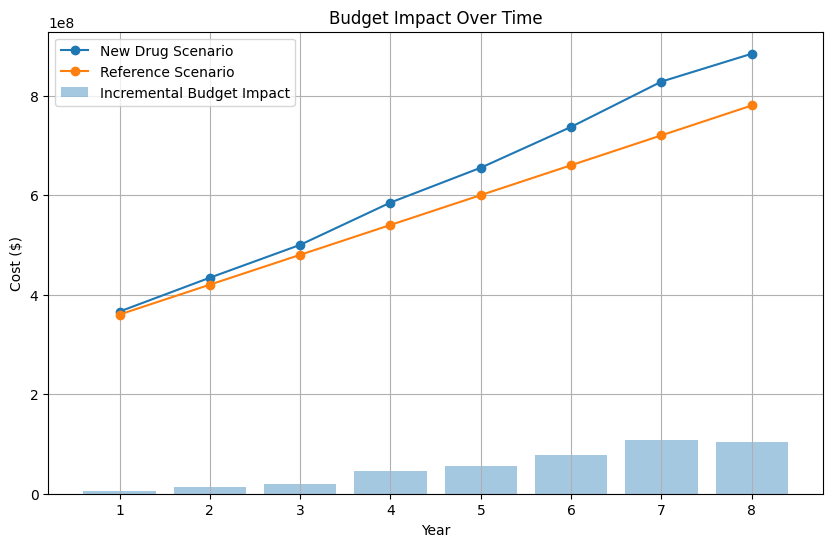

In [62]:


plt.figure(figsize=(10, 6))
plt.plot(results_df["Year"], results_df["Cost (New Drug Scenario)"], label="New Drug Scenario", marker='o')
plt.plot(results_df["Year"], results_df["Cost (Reference Scenario)"], label="Reference Scenario", marker='o')
plt.bar(results_df["Year"], results_df["Incremental Budget Impact"], alpha=0.4, label="Incremental Budget Impact")
plt.title("Budget Impact Over Time")
plt.xlabel("Year")
plt.ylabel("Cost ($)")
plt.legend()
plt.grid(True)
plt.show()


In [63]:


# Baseline parameters
baseline_drug_cost = 3000  # Annual cost per patient
baseline_cost_offset = 1000  # Annual savings per patient
uptake_rate = [0.1, 0.2, 0.25, 0.5, 0.55, 0.7, 0.9, 0.8]  # Uptake rates over 8 years

# Sensitivity ranges for one-way analysis
drug_cost_range = np.linspace(4000, 6000, 9)  # Vary drug cost from $4000 to $6000 (9 values)
cost_offset_range = np.linspace(500, 1500, 9)  # Vary cost offset from $500 to $1500 (9 values)

# Function to calculate incremental budget impact
def calculate_budget_impact(drug_cost, cost_offset):
    population_size = 1000000  # Population size: 1 million
    prevalence_rate = 0.1
    incidence_rate = 0.02
    time_horizon = len(uptake_rate)  # Use the correct variable (uptake_rate)
    total_impact = []

    for year in range(time_horizon):
        prevalent_cases = population_size * prevalence_rate
        incident_cases = population_size * incidence_rate * (year + 1)
        total_cases = prevalent_cases + incident_cases

        patients_on_new_drug = total_cases * uptake_rate[year]  # Use uptake_rate here
        patients_on_current_treatment = total_cases - patients_on_new_drug

        cost_new_drug_scenario = (
            patients_on_new_drug * drug_cost +
            patients_on_current_treatment * baseline_drug_cost -
            patients_on_new_drug * cost_offset
        )

        cost_reference_scenario = total_cases * baseline_drug_cost
        incremental_budget_impact = cost_new_drug_scenario - cost_reference_scenario
        total_impact.append(incremental_budget_impact)

    return np.sum(total_impact)

# Perform one-way sensitivity analysis for drug cost and cost offset
one_way_results_drug_cost = [calculate_budget_impact(dc, baseline_cost_offset) for dc in drug_cost_range]
one_way_results_cost_offset = [calculate_budget_impact(baseline_drug_cost, co) for co in cost_offset_range]



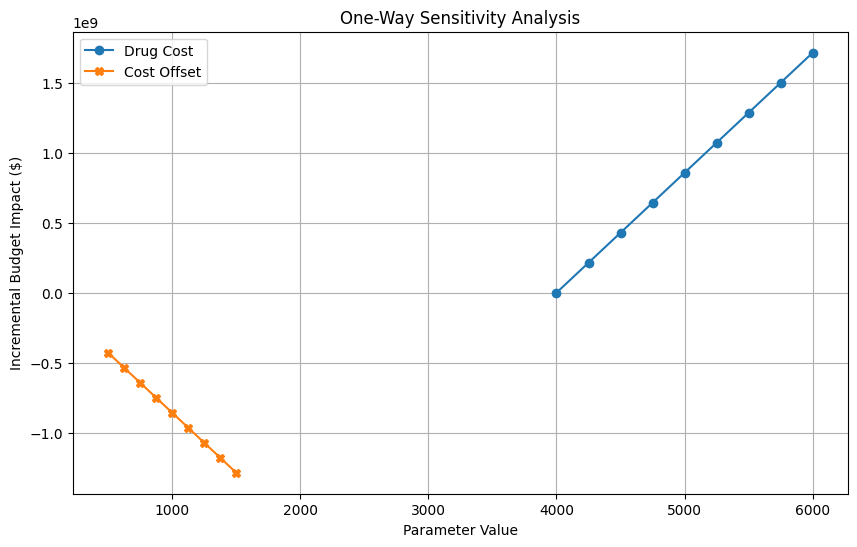

In [64]:
# Plot results of one-way sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(drug_cost_range, one_way_results_drug_cost, label="Drug Cost", marker='o')
plt.plot(cost_offset_range, one_way_results_cost_offset, label="Cost Offset", marker='X')
plt.title("One-Way Sensitivity Analysis")
plt.xlabel("Parameter Value")
plt.ylabel("Incremental Budget Impact ($)")
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Create a grid of values for drug cost and cost offset
drug_cost_values = np.linspace(4000, 6000, 8)
cost_offset_values = np.linspace(500, 1500, 8)

# Calculate budget impact for each combination of drug cost and cost offset
two_way_results = np.zeros((len(drug_cost_values), len(cost_offset_values)))

for i, dc in enumerate(drug_cost_values):
    for j, co in enumerate(cost_offset_values):
        two_way_results[i, j] = calculate_budget_impact(dc, co)



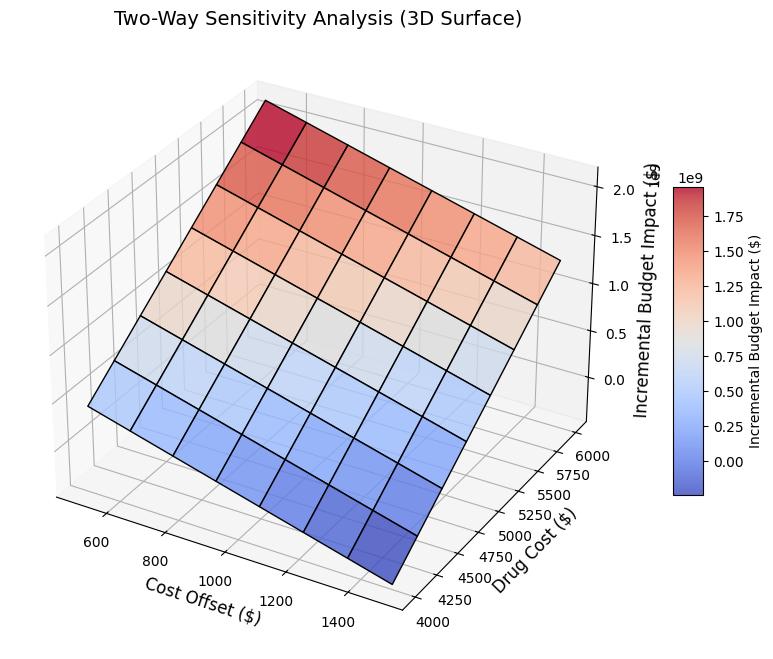

In [67]:


# Create a 3D surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for plotting
X, Y = np.meshgrid(cost_offset_values, drug_cost_values)
Z = two_way_results

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_title("Two-Way Sensitivity Analysis (3D Surface)", fontsize=14)
ax.set_xlabel("Cost Offset ($)", fontsize=12)
ax.set_ylabel("Drug Cost ($)", fontsize=12)
ax.set_zlabel("Incremental Budget Impact ($)", fontsize=12)

# Add color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label="Incremental Budget Impact ($)")

plt.show()


In [68]:
# Define distributions for PSA inputs (using normal distribution as an example)
n_simulations = 100000
psa_drug_costs = np.random.normal(5000, 500, n_simulations)  # Mean $5000, SD $500
psa_cost_offsets = np.random.normal(1000, 200, n_simulations)  # Mean $1000, SD $200

# Run PSA simulations
psa_results = []
for i in range(n_simulations):
    result = calculate_budget_impact(psa_drug_costs[i], psa_cost_offsets[i])
    psa_results.append(result)




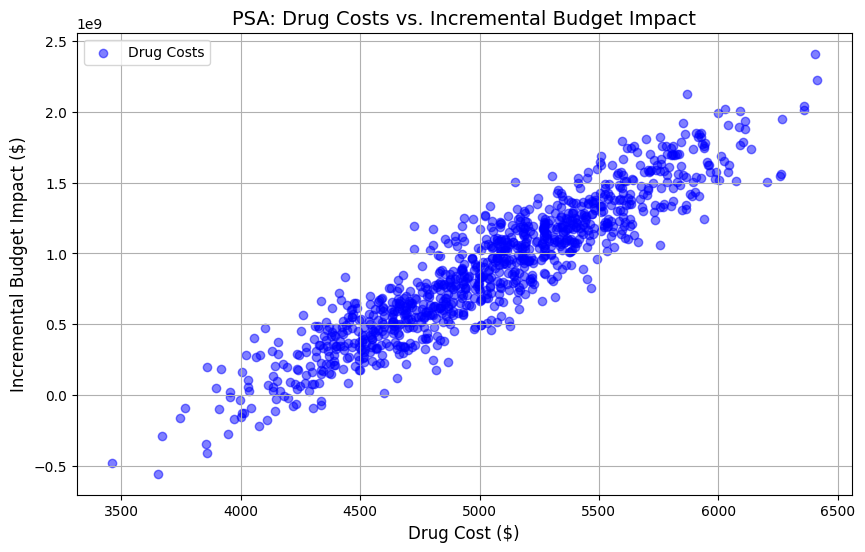

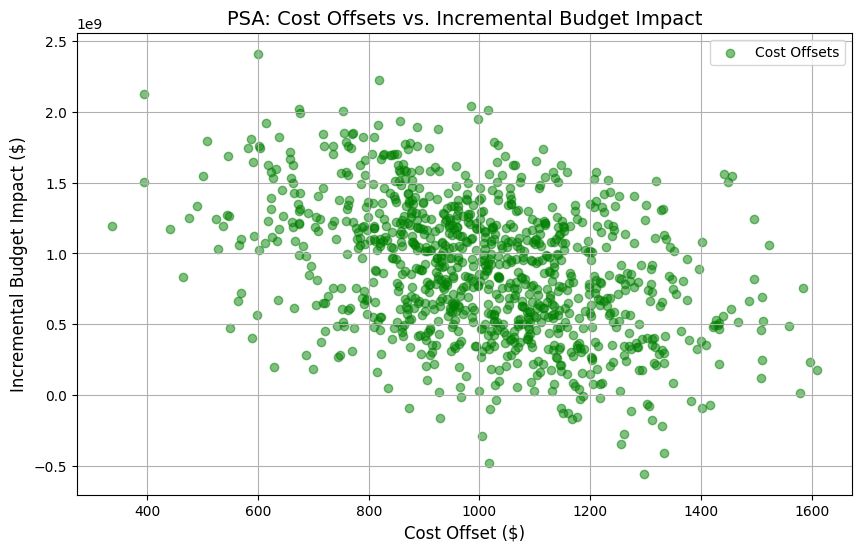

In [69]:
# Scatter plot of drug costs vs. PSA results
plt.figure(figsize=(10, 6))
plt.scatter(psa_drug_costs[:1000], psa_results[:1000], alpha=0.5, label="Drug Costs", color="blue")
plt.title("PSA: Drug Costs vs. Incremental Budget Impact", fontsize=14)
plt.xlabel("Drug Cost ($)", fontsize=12)
plt.ylabel("Incremental Budget Impact ($)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot of cost offsets vs. PSA results
plt.figure(figsize=(10, 6))
plt.scatter(psa_cost_offsets[:1000], psa_results[:1000], alpha=0.5, label="Cost Offsets", color="green")
plt.title("PSA: Cost Offsets vs. Incremental Budget Impact", fontsize=14)
plt.xlabel("Cost Offset ($)", fontsize=12)
plt.ylabel("Incremental Budget Impact ($)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


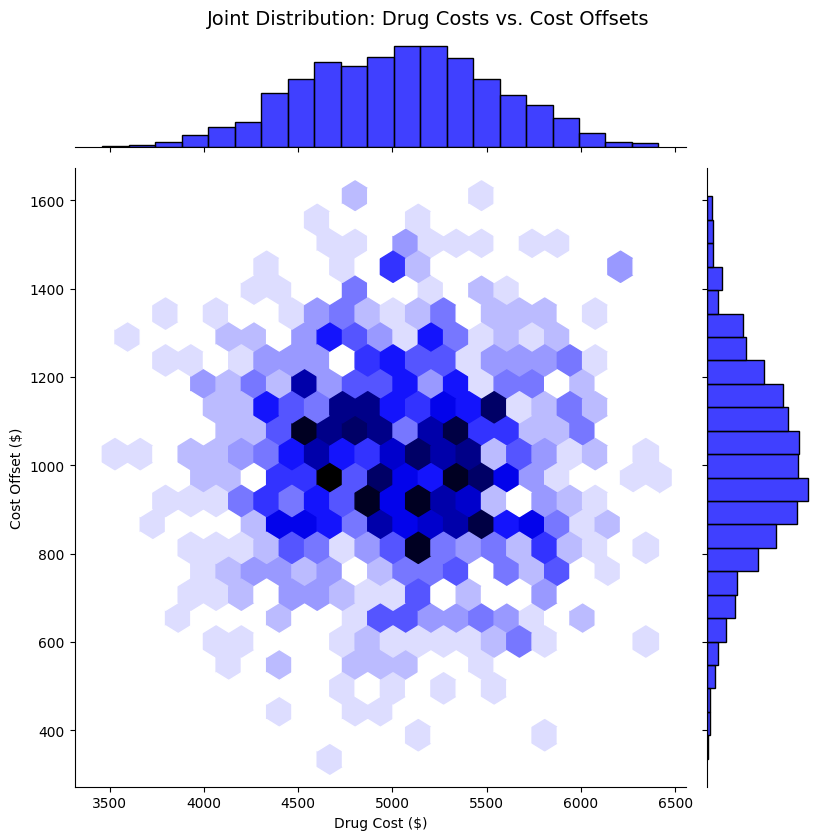

In [70]:
# Joint distribution plot for drug costs and cost offsets
sns.jointplot(x=psa_drug_costs[:1000], y=psa_cost_offsets[:1000], kind="hex", color="blue", height=8)
plt.suptitle("Joint Distribution: Drug Costs vs. Cost Offsets", y=1.02, fontsize=14)
plt.xlabel("Drug Cost ($)")
plt.ylabel("Cost Offset ($)")
plt.show()


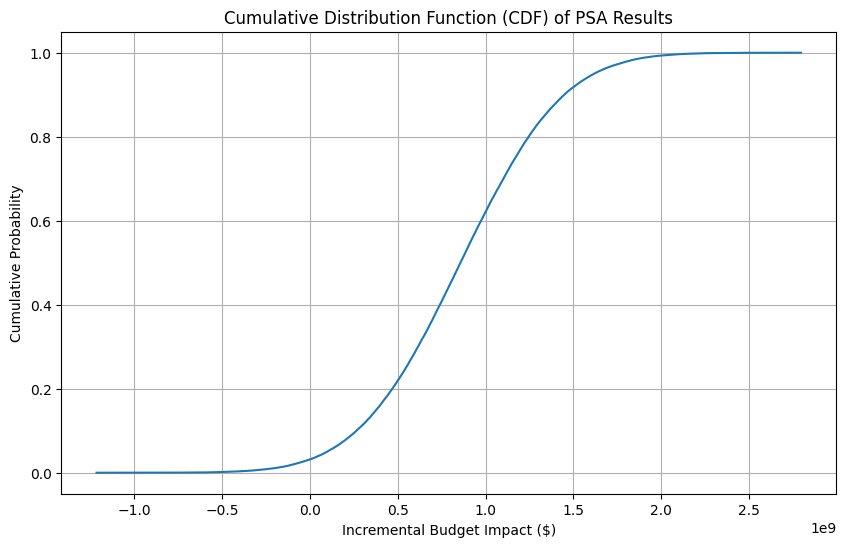

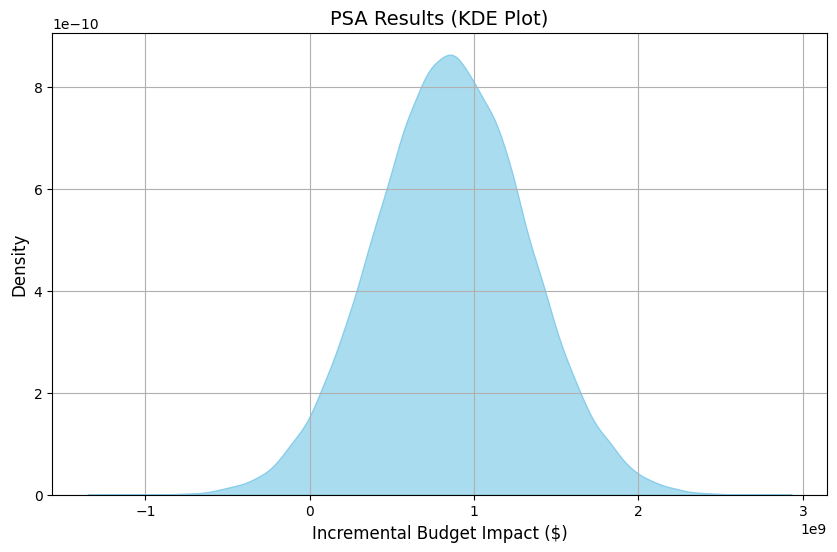

In [71]:
# Plot cumulative distribution function (CDF) of PSA results
psa_sorted_results = np.sort(psa_results)
cdf = np.arange(len(psa_sorted_results)) / float(len(psa_sorted_results))

plt.figure(figsize=(10, 6))
plt.plot(psa_sorted_results, cdf)
plt.title("Cumulative Distribution Function (CDF) of PSA Results")
plt.xlabel("Incremental Budget Impact ($)")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()


# KDE plot for PSA results
plt.figure(figsize=(10, 6))
sns.kdeplot(psa_results, fill=True, color="skyblue", alpha=0.7)
plt.title("PSA Results (KDE Plot)", fontsize=14)
plt.xlabel("Incremental Budget Impact ($)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.grid(True)
plt.show()